In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
with open(r'data/yellow_tripdata_2022-01.parquet', 'rb') as f:
    df = pd.read_parquet(f, engine='pyarrow')

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [5]:
df.shape

(2463931, 19)

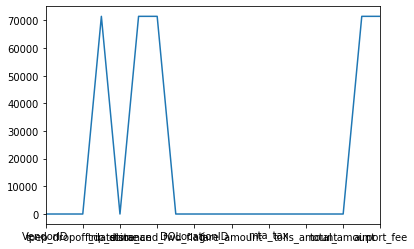

In [28]:
df.isnull().sum().plot()

In [7]:
df.isnull().sum().sum()

357515

In [8]:
df.notnull().sum()

VendorID                 2463931
tpep_pickup_datetime     2463931
tpep_dropoff_datetime    2463931
passenger_count          2392428
trip_distance            2463931
RatecodeID               2392428
store_and_fwd_flag       2392428
PULocationID             2463931
DOLocationID             2463931
payment_type             2463931
fare_amount              2463931
extra                    2463931
mta_tax                  2463931
tip_amount               2463931
tolls_amount             2463931
improvement_surcharge    2463931
total_amount             2463931
congestion_surcharge     2392428
airport_fee              2392428
dtype: int64

In [9]:
df.notnull().sum().sum()

46457174

In [25]:
df['PULocationID'].head(100)

0     142
1     236
2     166
3     114
4      68
5     138
6     233
7     238
8     166
9     236
10    141
11    114
12    234
13    246
14     43
15    239
16    148
17    237
18      7
19    107
20    263
21    161
22    161
23    239
24    239
25    246
26     79
27    170
28    138
29    237
     ... 
70     79
71     43
72     68
73    170
74     50
75    238
76    132
77    249
78    107
79     50
80     79
81    148
82    148
83    238
84    239
85    166
86    239
87    166
88    238
89    132
90    263
91    132
92    263
93    233
94    142
95    239
96    238
97    233
98    233
99    170
Name: PULocationID, Length: 100, dtype: int64

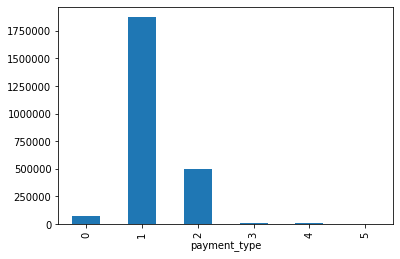

In [27]:
tip_amount_count = df.groupby('payment_type').size()


tip_amount_count.plot(kind='bar')
plt.show()